In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [68]:
uploaded = files.upload()

Saving used_cars_data.csv to used_cars_data (1).csv


## Information data

| Tên cột             | Ý nghĩa                                                  | Ghi chú                                                                                            |
| ------------------- | -------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| `S.No`              | Số thứ tự bản ghi                                        | Không mang thông tin thực chất, thường bỏ trong phân tích.                           |
| `Name`              | Tên xe (thương hiệu + mẫu)                               | Ví dụ: “Maruti Swift Dzire”, “Hyundai i20”. Có thể tách ra thành `Brand` và `Model`.  |
| `Year`              | Năm sản xuất của xe                                      | Số năm quan trọng vì ảnh hưởng lớn đến giá.                                          |
| `Location`          | Thành phố nơi xe được rao bán                            | Ví dụ: “Mumbai”, “Bangalore”. Dùng phân tích theo vùng.                               |
| `Kilometers_Driven` | Tổng số km đã chạy của xe đã dùng                        | Biến dạng số, thường lệch phải, cần log-transform.                                    |
| `Fuel_Type`         | Loại nhiên liệu                                          | Ví dụ: Petrol, Diesel, CNG, LPG, Electric…                                            |
| `Transmission`      | Hộp số                                                   | “Manual” hay “Automatic”.                                                             |
| `Owner_Type`        | Loại chủ xe trước (lần sở hữu)                           | Ví dụ: “First Owner”, “Second Owner”... ảnh hưởng đến giá.                            |
| `Mileage`           | Mức tiêu thụ nhiên liệu chuẩn của hãng (kmpl hoặc km/kg) | Chú ý: dạng text “XX kmpl” hay “XX km/kg”, nên tách số và đơn vị.                    |
| `Engine`            | Dung tích động cơ (cc)                                   | Dạng text, ví dụ “1197 cc”. Cần chuyển số.                                            |
| `Power`             | Công suất tối đa của động cơ                             | Dạng text, ví dụ “83.82 bhp”. Cần làm sạch.                                          |
| `Seats`             | Số chỗ ngồi của xe                                       | Ví dụ: 5, 7 chỗ. Có thể dùng nhóm (5, >5).                                            |
| `New_Price`         | Giá xe mới khi xuất xưởng (đơn vị & vùng: Ấn Độ)         | Dùng làm tham chiếu so với giá xe đã dùng.                                            |
| `Price`             | Giá của xe đã dùng (đơn vị INR) **– biến mục tiêu**      | Đối với bài toán học máy thường là target.                                            |

In [69]:
df=pd.read_csv("used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [70]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [71]:
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7060,7060,Honda Brio S MT,Coimbatore,2013,37922,Petrol,Manual,Second,19.4 kmpl,1198 CC,86.8 bhp,5.0,NaN,NaN
1605,1605,Mahindra XUV500 W10 2WD,Kolkata,2016,54000,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,13.00
3691,3691,Hyundai Grand i10 Sportz,Pune,2016,13436,Petrol,Manual,Second,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,4.70
560,560,Skoda Laura 1.9 TDI AT Elegance,Jaipur,2009,48000,Diesel,Automatic,First,17.0 kmpl,1896 CC,105 bhp,5.0,NaN,5.00
1925,1925,Audi Q5 30 TDI quattro Premium Plus,Coimbatore,2015,42747,Diesel,Automatic,Second,14.16 kmpl,1968 CC,174.3 bhp,5.0,NaN,39.47


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


- feature Year là năm sản xuất xe, nhưng năm khá lớn sẽ ảnh hưởng đến accuracy / prediction của mô hình
- các feature Mileage, Engine, Power cần sửa lại với các giá trị số và bỏ đi các đơn vị ở sau
- feature Name với các từ đầu tiên là tên hãng xe, nên cần tách ra, vì khả năng cao nó sẽ ảnh hưởng đến mô hình

In [73]:
df.isna().sum()/len(df)*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


- feature New_price có số lượng missing value quá lớn, chiếm 86% của cột, nên giải pháp tốt nhất là xóa cột này
- các feature Mileage, Engine, Power, Seat có số lượng null không lớn nên ta có thể dùng KNNImpution để fill null   
- target price với missing value khá nhiều với 17%, ta không thể fill null ví mô hình sẽ học sai, giải pháp được tôi đề ra ở đây là xóa các missing value

## Preprocessing

In [74]:
df_new=df

# Xử lý Year

- lấy năm hiện tại trừ đi Year

In [75]:
from datetime import datetime

In [76]:
df_new.Year=datetime.now().year-df.Year
df_new=df_new.rename(columns={"Year":"Age"})
df_new.head()

,S.No.,Name,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,15,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,10,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,14,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,13,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,12,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Xóa các feature và missing value của price

- xóa missing value của price

In [77]:
df_new.dropna(subset=['Price'], inplace=True)

- xóa các feature không cần thiết

In [78]:
df_new.drop(["S.No.","New_Price"],axis=1, inplace=True)
df_new.head()

,Name,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,15,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,10,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,14,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,13,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,12,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [79]:
df.shape[0]-df_new.shape[0]

1234

có 1234 hàng đã bị xóa

## Xử lý các cột category

- xử lý Name

In [80]:
df_new["Brand"] = df_new.Name.apply(lambda x: x.split(' ')[0])
df_new.drop("Name",axis=1,inplace=True)
df_new.Brand.value_counts()

,count
Brand,
Maruti,1211
Hyundai,1107
Honda,608
Toyota,411
Mercedes-Benz,318
Volkswagen,315
Ford,300
Mahindra,272
BMW,267


- nhận thấy có nhiều brand có giá tri rất ít nên có thể gộp lại

In [81]:
top_brands = df_new.Brand.value_counts().nlargest(10).index.tolist()
df_new.Brand = np.where(df_new.Brand.isin(top_brands), df_new['Brand'], 'Other Brand')
df_new.Brand.value_counts()

,count
Brand,
Maruti,1211
Hyundai,1107
Other Brand,974
Honda,608
Toyota,411
Mercedes-Benz,318
Volkswagen,315
Ford,300
Mahindra,272


- Vì Mileage có 2 loại đơn vị, nên ta phải thống nhất một loại đơn vị và chuyển về số

In [82]:
# Tách số và đơn vị
df_new[['Mileage_value', 'Mileage_unit']] = df_new['Mileage'].str.split(' ', expand=True)

# Chuyển số sang float
df_new['Mileage_value'] = df_new['Mileage_value'].astype(float)

# Chuyển km/kg sang kmpl
density_fuel = 0.74  # kg/l
df_new.loc[df_new['Mileage_unit'] == 'km/kg', 'Mileage_value'] *= density_fuel

df_new['Mileage'] = df_new['Mileage_value']

# Xóa cột tạm
df_new.drop(['Mileage_value', 'Mileage_unit'], axis=1, inplace=True)

df_new['Mileage'].head()

,Mileage
0,19.684
1,19.670
2,18.200
3,20.770
4,15.200


- bây giờ ta sẽ làm việc với Engine và Power

In [83]:
cols = ["Engine","Power"]

for col in cols:
    # Chuyển sang string, extract số
    df_new[col] = df_new[col].astype(str).str.extract('(\d+)')
    # Đổi string 'nan' về NaN
    df_new[col] = df_new[col].replace('nan', pd.NA)
    # Chuyển sang Int64 nullable
    df_new[col] = df_new[col].astype('Int64')
df_new.head()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2127780485.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_new[col] = df_new[col].astype(str).str.extract('(\d+)')


,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,15,72000,CNG,Manual,First,19.684,998,58,5.0,1.75,Maruti
1,Pune,10,41000,Diesel,Manual,First,19.670,1582,126,5.0,12.50,Hyundai
2,Chennai,14,46000,Petrol,Manual,First,18.200,1199,88,5.0,4.50,Honda
3,Chennai,13,87000,Diesel,Manual,First,20.770,1248,88,7.0,6.00,Maruti
4,Coimbatore,12,40670,Diesel,Automatic,Second,15.200,1968,140,5.0,17.74,Audi


- cột này là phân loại nhưng lại lại là kiểu text
    - ở đây có 1 vài hàng có giá trị là "Four & Above" nên sẽ chuyển hẳn về 4 vì để sang kiểu category sẽ không ảnh hưởng đến mô hình

In [84]:
for i in range(len(df_new)):
    val = str(df_new.loc[i, "Owner_Type"]).strip()
    if val == "First":
        df_new.loc[i, "Owner_Type"] = 1
    elif val == "Second":
        df_new.loc[i, "Owner_Type"] = 2
    elif val == "Third":
        df_new.loc[i, "Owner_Type"] = 3
    else:
        df_new.loc[i, "Owner_Type"] = 4  # mặc định tất cả còn lại
df_new.Owner_Type.value_counts()

,count
Owner_Type,
1,4929
2,968
3,113
4,9


In [85]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Age                6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   Int64  
 8   Power              5876 non-null   Int64  
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
 11  Brand              6019 non-null   object 
dtypes: Int64(2), float64(3), int64(2), object(5)
memory usage: 752.1+ KB


In [86]:
df.Location.value_counts()/len(df)*100

,count
Location,
Mumbai,13.084241
Hyderabad,12.077761
Coimbatore,10.643872
Kochi,10.643872
Pune,10.547360
Delhi,9.099683
Kolkata,9.016958
Chennai,8.148352
Jaipur,6.879912


- Không có giá trị nào quá bé kiểu 0.1% — nhỏ nhất vẫn ~3.8% (Ahmedabad)
- Tức là tất cả các location đều đủ lớn để mô hình học được
- Không có outlier, không có giá trị vô lí
- Không có category hiếm đến mức gây noise hay làm mô hình lệch

- Nên không cần xử lý đặc biệt

## Statistics, Data Visualization, Handling Missing Data

### Target

In [87]:
df_new.Price.skew()

np.float64(3.3352319876668415)

<Axes: xlabel='Price', ylabel='Count'>

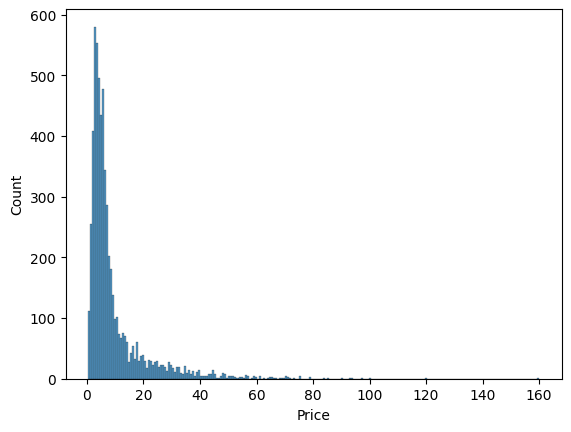

In [88]:
sns.histplot(df_new.Price)

- dựa vào skew và histplot ta có thể thấy dữ liệu lệch phải rất nặng, với đuôi kéo dài, nếu dựa vào IQR để xóa dữ liệu thì sẽ loại bỏ rất nhiều dữ liệu
- dùng thử Log Transformation

<Axes: xlabel='Price', ylabel='Count'>

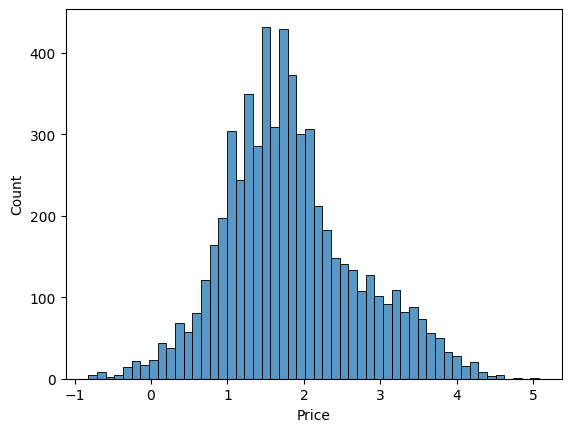

In [89]:
log_price=np.log(df_new.Price)
sns.histplot(log_price)

- có thể thấy cách này rất hiệu quả vì sau khi scale thì dữ liệu trở thành gần như phân phối chuẩn
- vậy nên có thể gán lại cho price để sử dụng cho mô hình

In [90]:
df_new.Price=log_price

In [91]:
df_new.head()

,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,15,72000,CNG,Manual,1,19.684,998,58,5.0,0.559616,Maruti
1,Pune,10,41000,Diesel,Manual,1,19.670,1582,126,5.0,2.525729,Hyundai
2,Chennai,14,46000,Petrol,Manual,1,18.200,1199,88,5.0,1.504077,Honda
3,Chennai,13,87000,Diesel,Manual,1,20.770,1248,88,7.0,1.791759,Maruti
4,Coimbatore,12,40670,Diesel,Automatic,2,15.200,1968,140,5.0,2.875822,Audi


## Feature

### Seats

In [92]:
df.Seats.value_counts()

,count
Seats,
5.0,6047
7.0,796
8.0,170
4.0,119
6.0,38
2.0,18
10.0,8
9.0,3
0.0,1


- vì mô hình ML thường nhạy cảm với categorical/ordinal có quá nhiều nhóm nhỏ → có thể ảnh hưởng đến accuracy.
- nên ta có các giải pháp
    - ở đây ta thấy vô lí ở chỗ seats=0, vô lí vì xe pharicos ít nhất 1 chỗ, vì vậy sẽ xóa ra khỏi dữ liệu
    - các giá trị 2,9,10 xuất hiện rất ít nên ta sẽ xóa ra khỏi dữ liệu, vì nó rất ít nên không cần fill giá trị thì cũng sẽ không ảnh hưởng nhiều đến mô hình
    - các giá trị 6, 4, 8 có thêm gộp lại để giảm số lượng category nhỏ, tránh mô hình học noise.

- xóa cột 0

In [93]:
df_new = df_new[df_new["Seats"] != 0]

- xóa giá trị 2, 9, 10

In [94]:
rare_values = [2, 9, 10]
df_new = df_new[~df_new["Seats"].isin(rare_values)]

gộp lại lấy giá trị trung bình là 6

In [95]:
mapping = {
    4: 6,
    6: 6,
    8: 6
}

df_new["Seats"] = df_new["Seats"].replace(mapping)

In [96]:
df_new.Seats.value_counts()

,count
Seats,
5.0,5014
7.0,674
6.0,264


### Kilometers Driven

In [97]:
df.Kilometers_Driven.skew()

np.float64(61.582574656174806)

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

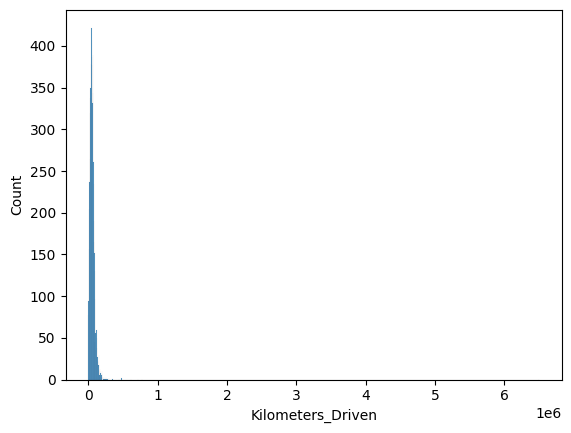

In [98]:
sns.histplot(df.Kilometers_Driven)

<Axes: ylabel='Kilometers_Driven'>

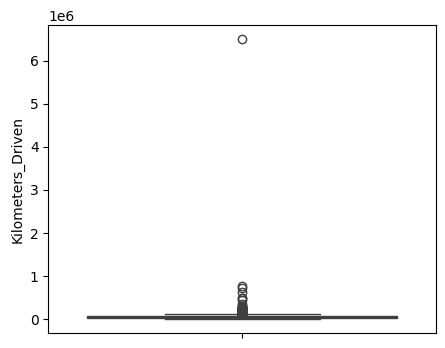

In [99]:
plt.figure(figsize=(5,4))
sns.boxplot(df.Kilometers_Driven )

In [100]:
Q1 = df_new.Kilometers_Driven.quantile(0.25)
Q3 = df_new.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [101]:
outliers_Driven = df_new.Kilometers_Driven[(df_new.Kilometers_Driven < lower_bound) |
                                (df_new.Kilometers_Driven > upper_bound)]

len(outliers_Driven)/len(df_new)*100

3.33667000333667

- có thể thấy outliers rất ít chỉ sấp xĩ 4% và dữ liệu lệch phải
- dùng thử Log Transformation

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

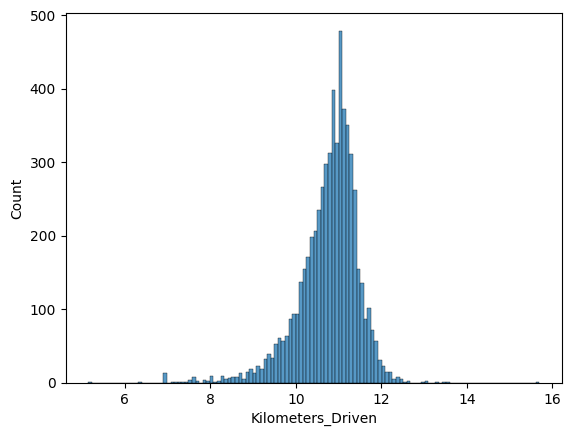

In [102]:
log_kilometers_driven=np.log(df_new.Kilometers_Driven)
sns.histplot(log_kilometers_driven)

- có thể thấy sau khi dùng dữ liệu đã tiến gần tới phân phối chuẩn
- ta có thể dùng giá trị mới này

In [103]:
df_new.Kilometers_Driven=log_kilometers_driven

### Fuel Type

In [104]:
df_new.Fuel_Type.value_counts()

,count
Fuel_Type,
Diesel,3196
Petrol,2730
CNG,56
LPG,10
Electric,2


In [105]:
df.Fuel_Type.value_counts()/len(df)*100

,count
Fuel_Type,
Diesel,53.109058
Petrol,45.843099
CNG,0.854819
LPG,0.165449
Electric,0.027575


- có thể thấy CNG, LPG, Electric có giá trị rất ít trong data
- vậy nên ta sẽ nhóm 3 giá trị này lại thành others
- ta có thể thấy các giá trị này không có ý nghĩa về giá trị, chỉ có ý nghĩa về 0/1

In [106]:
rare_fuels = ['CNG', 'LPG', 'Electric']

# 2. Thay thế các danh mục hiếm bằng 'Other'
df_new.Fuel_Type = df_new.Fuel_Type.replace(rare_fuels, 'Other')

In [107]:
df_new.Fuel_Type.value_counts()

,count
Fuel_Type,
Diesel,3196
Petrol,2730
Other,68


<Axes: xlabel='Fuel_Type', ylabel='Price'>

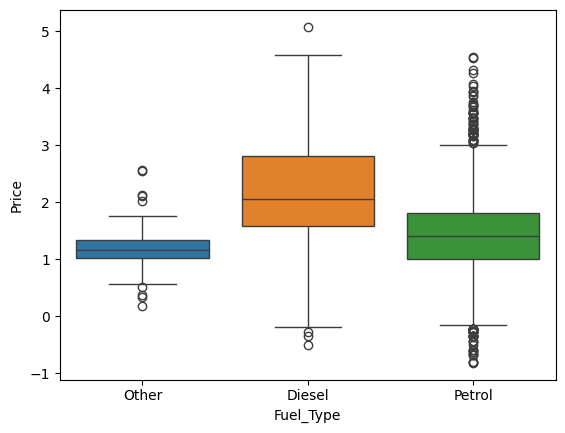

In [108]:
sns.boxplot(data=df_new, x="Fuel_Type", y="Price", hue="Fuel_Type")

- theo fuel type thì price có rất nhiều outliers tập trung ở Petrol

### Owner Type

In [109]:
df_new.Owner_Type.value_counts()

,count
Owner_Type,
1,4910
2,964
3,111
4,9


<Axes: xlabel='Owner_Type', ylabel='Price'>

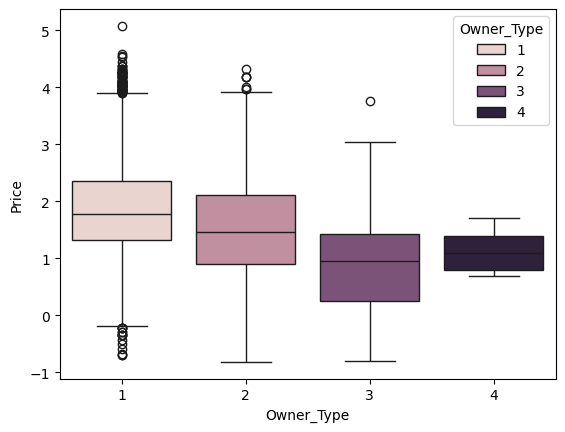

In [110]:
sns.boxplot(data=df_new, x="Owner_Type", y="Price", hue="Owner_Type")

- Fourth & Above ít nhưng cũng không có outliers, nên ta sẽ gộp Fourth & Above và Third lại

In [111]:
df_new['Owner_Type'] = df_new['Owner_Type'].replace(4, 3)
df_new.Owner_Type.value_counts()

/tmp/ipython-input-1007667298.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['Owner_Type'] = df_new['Owner_Type'].replace(4, 3)


,count
Owner_Type,
1,4910
2,964
3,120


## Hadling Missing Data

In [112]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5994 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5994 non-null   object 
 1   Age                5994 non-null   int64  
 2   Kilometers_Driven  5994 non-null   float64
 3   Fuel_Type          5994 non-null   object 
 4   Transmission       5994 non-null   object 
 5   Owner_Type         5994 non-null   int64  
 6   Mileage            5992 non-null   float64
 7   Engine             5958 non-null   Int64  
 8   Power              5856 non-null   Int64  
 9   Seats              5952 non-null   float64
 10  Price              5994 non-null   float64
 11  Brand              5994 non-null   object 
dtypes: Int64(2), float64(4), int64(2), object(4)
memory usage: 620.5+ KB


In [113]:
from sklearn.impute import KNNImputer

In [114]:
numeric_cols_with_nulls = ['Mileage', 'Engine', 'Power', 'Seats']

In [115]:
imputer = KNNImputer(n_neighbors=5)
# Fit và Transform (điền thiếu) trên các cột đã chọn
df_imputed_array = imputer.fit_transform(df_new[numeric_cols_with_nulls])

# Tạo lại DataFrame mới từ mảng đã điền
df_imputed = pd.DataFrame(df_imputed_array, columns=numeric_cols_with_nulls, index=df_new.index)

# Cập nhật các cột đã điền vào DataFrame gốc (df_new)
df_new[numeric_cols_with_nulls] = df_imputed

In [116]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5994 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5994 non-null   object 
 1   Age                5994 non-null   int64  
 2   Kilometers_Driven  5994 non-null   float64
 3   Fuel_Type          5994 non-null   object 
 4   Transmission       5994 non-null   object 
 5   Owner_Type         5994 non-null   int64  
 6   Mileage            5994 non-null   float64
 7   Engine             5994 non-null   float64
 8   Power              5994 non-null   float64
 9   Seats              5994 non-null   float64
 10  Price              5994 non-null   float64
 11  Brand              5994 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 608.8+ KB


In [117]:
df_new.head()

,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,15,11.184421,Other,Manual,1,19.684,998.0,58.0,5.0,0.559616,Maruti
1,Pune,10,10.621327,Diesel,Manual,1,19.670,1582.0,126.0,5.0,2.525729,Hyundai
2,Chennai,14,10.736397,Petrol,Manual,1,18.200,1199.0,88.0,5.0,1.504077,Honda
3,Chennai,13,11.373663,Diesel,Manual,1,20.770,1248.0,88.0,7.0,1.791759,Maruti
4,Coimbatore,12,10.613246,Diesel,Automatic,2,15.200,1968.0,140.0,5.0,2.875822,Audi


# Feature Selection

In [119]:
X = pd.get_dummies(df_new.drop(columns=['Price']), drop_first=True)
y = df_new['Price']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

for name, score in feature_importance:
    print(name, score)

Power 0.6228029041771678
Age 0.24559470288011853
Engine 0.030402986217506124
Kilometers_Driven 0.01950141222214939
Mileage 0.01814157839306
Transmission_Manual 0.006349164118895028
Brand_Other Brand 0.005366210330486705
Location_Kolkata 0.0049071215395827235
Brand_Mahindra 0.004390611103758507
Brand_Mercedes-Benz 0.004102394372536309
Seats 0.004097409765859819
Fuel_Type_Petrol 0.0037165461010401283
Location_Hyderabad 0.003670125257130201
Brand_Honda 0.0032030916390247796
Location_Coimbatore 0.002862198262062012
Owner_Type 0.002808235884159071
Brand_Toyota 0.002619619142584262
Location_Delhi 0.0016506282569560904
Location_Mumbai 0.0015814754127172078
Brand_Maruti 0.0015710790668574082
Location_Bangalore 0.001563602986291254
Brand_Hyundai 0.001559989095633965
Location_Pune 0.0014143059014366
Brand_Volkswagen 0.0013813863317285661
Location_Jaipur 0.001291497531957955
Location_Kochi 0.0010547006384035195
Location_Chennai 0.0009964169460683692
Brand_BMW 0.0006792489629801097
Brand_Ford 0.00

<Axes: >

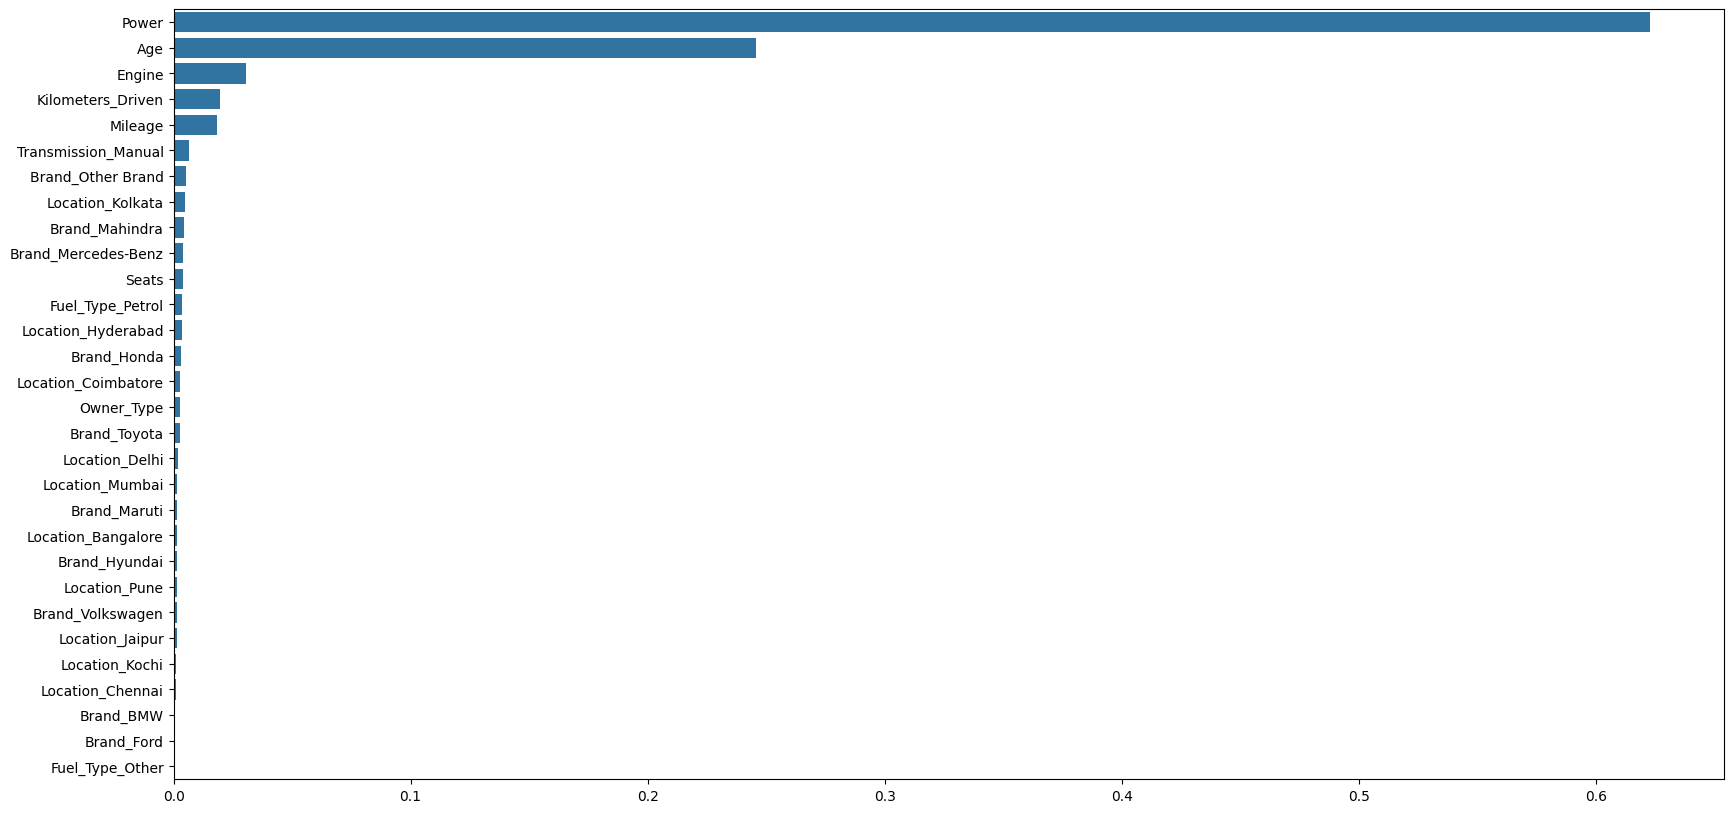

In [120]:
plt.figure(figsize=(20,10))
features = [f[0] for f in feature_importance]
importances = [f[1] for f in feature_importance]
sns.barplot(x=importances, y=features)

1. Feature quan trọng cao
- Power (0.623) → biến quan trọng nhất, chiếm hơn 60% độ ảnh hưởng.
→ Rõ ràng công suất xe là yếu tố chính quyết định giá.
- Age (0.249) → tuổi xe cũng khá quan trọng, gần 25% ảnh hưởng.
- Nhận xét: Đây là 2 biến numeric chính, trực tiếp liên quan tới giá trị xe.

2. Feature ít quan trọng
- Engine, Mileage, Kilometers_Driven, Brand → ảnh hưởng thấp, nhưng vẫn có vai trò nhỏ.
- Transmission_Manual, Fuel_Type_Petrol, Seats → hầu như không ảnh hưởng nhiều.
- Nhận xét: Các đặc trưng kỹ thuật và option của xe ít quyết định giá hơn so với Power và Age.

3. Feature categorical về Location
- Các biến Location_* đều < 0.005 → gần như không ảnh hưởng.
- Ví dụ Location_Mumbai chỉ 0.0017, tức vị trí không phải là yếu tố chính trong tập dữ liệu này.

- Giữ các numeric quan trọng: Power, Age, Engine, Mileage, Kilometers_Driven.
- Loại bỏ các biến ít quan trọng: Location_*, Transmission, Fuel_Type_*, Owner_Type, Seats.

# Model

In [121]:
categorical_cols = ["Brand",'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
for col in categorical_cols:
    df_new[col] = df_new[col].astype('category')

## Random Forest

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x=df_new.drop("Price",axis=1)
y = df_new.Price

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape

(4795, 11)

In [125]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Brand",'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [128]:
y_pred_rf = rf.predict(X_test)

In [129]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

Random Forest RMSE: 0.2182, R2: 0.9358


## XGBoost

In [130]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [131]:

y_pred_xgb = xgb_model.predict(X_test)

In [132]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")

XGBoost RMSE: 0.1908, R2: 0.9509


## Nhận xét về model

Random Forest RMSE: 0.2182, R2: 0.9358   
XGBoost RMSE: 0.1908, R2: 0.9509

Mô hình XGBoost là lựa chọn tối ưu cho bài toán này, cho kết quả dự đoán với độ chính xác và độ tin cậy rất cao. Việc sử dụng Log-transform cho biến mục tiêu cũng là một bước xử lý tốt giúp cải thiện hiệu suất của cả hai mô hình.